In [2]:
import os
import numpy as np
import pandas as pd

In [3]:
os.chdir('data')

In [4]:
[file for file in os.listdir() if(file.endswith('.csv'))]

['Median Incomes.csv',
 'Median Monthly Rent.csv',
 'Home Ownership.csv',
 'Total Population.csv',
 'Uninsured.csv',
 'Unemployment Rate.csv',
 'Severe Rent Burden.csv',
 'Educational Attainment.csv',
 'Overcrowded Rental Housing.csv',
 'SNAP (Food Stamps).csv',
 'Household Income.csv',
 'Public Assistance.csv',
 'Employment Population Ratio.csv',
 'Total Population by Race_Ethnicity.csv']

In [5]:
dfs = {}
for file in os.listdir():
    if (file.endswith('.csv')):
        key = file[:-4].replace(' ', '_').lower()
        #print(key)
        dfs[key] = pd.read_csv(file, skiprows=4, encoding='utf8', low_memory=False)
        #print(f"{key} - {sorted(set(dfs[key]['TimeFrame'].tolist()))}")

In [6]:
dfs.keys()

dict_keys(['median_incomes', 'median_monthly_rent', 'home_ownership', 'total_population', 'uninsured', 'unemployment_rate', 'severe_rent_burden', 'educational_attainment', 'overcrowded_rental_housing', 'snap_(food_stamps)', 'household_income', 'public_assistance', 'employment_population_ratio', 'total_population_by_race_ethnicity'])

In [7]:
for key in dfs.keys():
    print(f'{key} - {dfs[key].columns.tolist()}')
    print(sorted(dfs[key]['TimeFrame'].value_counts().index))

median_incomes - ['Location', 'Household Type', 'TimeFrame', 'DataFormat', 'Data', 'Fips']
[2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
median_monthly_rent - ['Location', 'TimeFrame', 'DataFormat', 'Data', 'Fips']
[2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
home_ownership - ['Location', 'TimeFrame', 'DataFormat', 'Data', 'Fips']
[2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
total_population - ['Location', 'TimeFrame', 'DataFormat', 'Data', 'Fips']
[2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
uninsured - ['Location', 'Age Group', 'TimeFrame', 'DataFormat', 'Data', 'Fips']
[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
unemployment_rate - ['Location', 'TimeFrame', 'DataFormat', 'Data', 'Fips']
[2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
severe_rent_burden - ['Location', 

In [8]:
for key in dfs.keys():
    if('Number' in list(set(dfs[key]['DataFormat'].tolist())) ):
        print(key)
        

total_population
uninsured
educational_attainment
snap_(food_stamps)
household_income
public_assistance
total_population_by_race_ethnicity


In [9]:
standard = {}
extra = {}
for key in dfs.keys():
    if(dfs[key].columns[1] == 'TimeFrame' and key != 'public_assistance'):
        print(f'{key} - {dfs[key].columns.tolist()}')
        standard[key] = dfs[key]
        if(key == 'total_population'):
            standard[key] = dfs[key][~dfs[key].Fips.str.contains('uhf')]
            standard[key].Fips = standard[key].Fips.astype(int)
        if(key == 'median_monthly_rent'):
            standard[key]['DataFormat'] = 'Number'
    else:
        extra[key] = dfs[key]
    #print(dfs[key].head(2))

median_monthly_rent - ['Location', 'TimeFrame', 'DataFormat', 'Data', 'Fips']
home_ownership - ['Location', 'TimeFrame', 'DataFormat', 'Data', 'Fips']
total_population - ['Location', 'TimeFrame', 'DataFormat', 'Data', 'Fips']
unemployment_rate - ['Location', 'TimeFrame', 'DataFormat', 'Data', 'Fips']
severe_rent_burden - ['Location', 'TimeFrame', 'DataFormat', 'Data', 'Fips']
overcrowded_rental_housing - ['Location', 'TimeFrame', 'DataFormat', 'Data', 'Fips']
employment_population_ratio - ['Location', 'TimeFrame', 'DataFormat', 'Data', 'Fips']


/Users/tavares/opt/anaconda3/envs/PythonML/lib/python3.6/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [10]:
print('standard: ', list(standard.keys()))
print('')
print('extra: ', list(extra.keys()))

standard:  ['median_monthly_rent', 'home_ownership', 'total_population', 'unemployment_rate', 'severe_rent_burden', 'overcrowded_rental_housing', 'employment_population_ratio']

extra:  ['median_incomes', 'uninsured', 'educational_attainment', 'snap_(food_stamps)', 'household_income', 'public_assistance', 'total_population_by_race_ethnicity']


In [31]:
df = standard['median_monthly_rent'][['TimeFrame','Fips','Location']]

In [32]:
df = df.merge(standard['total_population'][['TimeFrame','Fips','Data']].rename(columns={'Data':'Population'}),on=['TimeFrame','Fips'],how='left', left_index=False, right_index=False)

In [33]:
df = df.merge(standard['median_monthly_rent'][['TimeFrame','Fips','Data']].rename(columns={'Data':'Rent'}),on=['TimeFrame','Fips'],how='left', left_index=False, right_index=False)

In [34]:
df = df.merge(standard['severe_rent_burden'][['TimeFrame','Fips','Data']].rename(columns={'Data':'Rent_Burden'}),on=['TimeFrame','Fips'],how='left', left_index=False, right_index=False)
df = df.merge(standard['overcrowded_rental_housing'][['TimeFrame','Fips','Data']].rename(columns={'Data':'Overcrowded'}),on=['TimeFrame','Fips'],how='left', left_index=False, right_index=False)

In [35]:
df = df.merge(standard['home_ownership'][['TimeFrame','Fips','Data']].rename(columns={'Data':'Owner'}),on=['TimeFrame','Fips'],how='left', left_index=False, right_index=False)

In [36]:
df = df.merge(standard['employment_population_ratio'][['TimeFrame','Fips','Data']].rename(columns={'Data':'Employment_Ratio'}),on=['TimeFrame','Fips'],how='left', left_index=False, right_index=False)
df = df.merge(standard['unemployment_rate'][['TimeFrame','Fips','Data']].rename(columns={'Data':'Unemployment'}),on=['TimeFrame','Fips'],how='left', left_index=False, right_index=False)

In [17]:
print(df.shape)
df.head()

(910, 10)


,TimeFrame,Fips,Location,Population,Rent,Rent_Burden,Overcrowded,Owner,Employment_Ratio,Unemployment
0,2005,101,Battery Park/Tribeca,51150.45963,2191.21645,0.17644,0.03794,0.26053,0.751,0.033
1,2005,102,Greenwich Village,75508.54037,2191.21645,0.17644,0.03794,0.26053,0.751,0.033
2,2005,103,Lower East Side,145556.00000,817.19484,0.23809,0.08153,0.13708,0.564,0.088
3,2005,104,Chelsea/Clinton,88754.39184,1781.33008,0.19318,0.04339,0.20554,0.677,0.066
4,2005,105,Midtown Business District,44420.60816,1781.33008,0.19318,0.04339,0.20554,0.677,0.066


In [18]:
for key in extra:
    print(f'{key} - {extra[key].columns.tolist()}')

median_incomes - ['Location', 'Household Type', 'TimeFrame', 'DataFormat', 'Data', 'Fips']
uninsured - ['Location', 'Age Group', 'TimeFrame', 'DataFormat', 'Data', 'Fips']
educational_attainment - ['Location', 'Education Level', 'TimeFrame', 'DataFormat', 'Data', 'Fips']
snap_(food_stamps) - ['Location', 'Recipient', 'TimeFrame', 'DataFormat', 'Data', 'Fips']
household_income - ['Location', 'Income Level', 'TimeFrame', 'DataFormat', 'Data', 'Fips']
public_assistance - ['Location', 'TimeFrame', 'DataFormat', 'Data', 'Fips']
total_population_by_race_ethnicity - ['Location', 'Race/Ethnicity', 'TimeFrame', 'DataFormat', 'Data', 'Fips']


In [37]:
median_incomes = extra['median_incomes'][extra['median_incomes']['Household Type']=='All Households']
median_incomes = median_incomes[['TimeFrame','Fips','DataFormat','Data']].set_index(['TimeFrame','Fips','DataFormat']).unstack()
median_incomes.columns = ['Median_Income']
#median_incomes['Type'] = 'median_income'
median_incomes = median_incomes.reset_index()
print(median_incomes.shape)
median_incomes.head()
df = df.merge(median_incomes,on=['TimeFrame','Fips'],how='left', left_index=False, right_index=False)

(910, 3)


In [38]:
uninsured = extra['uninsured'][extra['uninsured']['Age Group']=='All Ages']
uninsured = uninsured[['TimeFrame','Fips','DataFormat','Data']].set_index(['TimeFrame','Fips','DataFormat']).unstack()
uninsured.columns = ['Uninsured_No','Uninsured_Pct']
#uninsured['Type'] = 'uninsured'
uninsured = uninsured.reset_index()
print(uninsured.shape)
uninsured.head()
df = df.merge(uninsured,on=['TimeFrame','Fips'],how='left', left_index=False, right_index=False)

(715, 4)


In [39]:
education = extra['educational_attainment']
education = education[['TimeFrame','Fips','Education Level','DataFormat','Data']]
education = education[education['Education Level'].str.contains('Bachelor')]
education = education.set_index(['TimeFrame','Fips','Education Level','DataFormat']).unstack()
education.columns = ['Education_No','Education_Pct']
#education['Type'] = 'education'
education = education.reset_index().rename(columns={'Education Level': 'Education_Level'})
print(education.shape)
education.head()
df = df.merge(education,on=['TimeFrame','Fips'],how='left', left_index=False, right_index=False)

(845, 5)


In [40]:
snap = extra['snap_(food_stamps)'][extra['snap_(food_stamps)']['Recipient']=='Households']
snap = snap[['TimeFrame','Fips','DataFormat','Data']].set_index(['TimeFrame','Fips','DataFormat']).unstack()
snap.columns = ['Snap_No','Snap_Pct']
#snap['Type'] = 'snap'
snap = snap.reset_index()
print(snap.shape)
snap.head()
df = df.merge(snap,on=['TimeFrame','Fips'],how='left', left_index=False, right_index=False)

(715, 4)


In [ ]:
#df.to_csv('../data.csv')

In [41]:
df.shape

(910, 18)

In [ ]:
households = extra['household_income']
households = households[['TimeFrame','Fips','Income Level','DataFormat','Data']].set_index(['TimeFrame','Fips','Income Level','DataFormat']).unstack()
households.columns = ['Income_No','Income_Pct']
#households['Type'] = 'household_income'
households = households.reset_index().rename(columns={'Income Level': 'Income_Level'})
print(households.shape)
households.head()
df = df.merge(households,on=['TimeFrame','Fips'],how='left', left_index=False, right_index=False)

In [ ]:
public_assistance = extra['public_assistance']
public_assistance = public_assistance[['TimeFrame','Fips','DataFormat','Data']].set_index(['TimeFrame','Fips','DataFormat']).unstack()
public_assistance.columns = ['PA_No','PA_Pct']
#public_assistance['Type'] = 'public_assistance'
public_assistance = public_assistance.reset_index()
print(public_assistance.shape)
public_assistance.head()
df = df.merge(public_assistance,on=['TimeFrame','Fips'],how='left', left_index=False, right_index=False)

In [ ]:
pop_by_race = extra['total_population_by_race_ethnicity']
pop_by_race = pop_by_race[['TimeFrame','Fips','Race/Ethnicity','DataFormat','Data']].set_index(['TimeFrame','Fips','Race/Ethnicity','DataFormat']).unstack()
pop_by_race.columns = ['Race_No','Race_Pct']
#pop_by_race['Type'] = 'population_by_race'
pop_by_race = pop_by_race.reset_index().rename(columns={'Race/Ethnicity': 'Race'})
print(pop_by_race.shape)
pop_by_race.head()
df = df.merge(pop_by_race,on=['TimeFrame','Fips'],how='left', left_index=False, right_index=False)

In [ ]:
sorted(pop_by_race['TimeFrame'].value_counts().index)

In [20]:
print(df.shape)
print(sorted(df['TimeFrame'].value_counts().index))
print(df.columns.tolist())
df.head(10)

(910, 18)
[2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
['TimeFrame', 'Fips', 'Location', 'Population', 'Rent', 'Rent_Burden', 'Overcrowded', 'Owner', 'Employment_Ratio', 'Unemployment', 'Median_Income', 'Uninsured_No', 'Uninsured_Pct', 'Education_Level', 'Education_No', 'Education_Pct', 'Snap_No', 'Snap_Pct']


,TimeFrame,Fips,Location,Population,Rent,Rent_Burden,Overcrowded,Owner,Employment_Ratio,Unemployment,Median_Income,Uninsured_No,Uninsured_Pct,Education_Level,Education_No,Education_Pct,Snap_No,Snap_Pct
0,2005,101,Battery Park/Tribeca,51150.45963,2191.21645,0.17644,0.03794,0.26053,0.751,0.033,116703.49427,NaN,NaN,NaN,NaN,NaN,1198.0,0.04744
1,2005,102,Greenwich Village,75508.54037,2191.21645,0.17644,0.03794,0.26053,0.751,0.033,116703.49427,NaN,NaN,NaN,NaN,NaN,2525.0,0.05822
2,2005,103,Lower East Side,145556.00000,817.19484,0.23809,0.08153,0.13708,0.564,0.088,40241.54525,NaN,NaN,NaN,NaN,NaN,14828.0,0.21802
3,2005,104,Chelsea/Clinton,88754.39184,1781.33008,0.19318,0.04339,0.20554,0.677,0.066,88613.25358,NaN,NaN,NaN,NaN,NaN,8107.0,0.15767
4,2005,105,Midtown Business District,44420.60816,1781.33008,0.19318,0.04339,0.20554,0.677,0.066,88613.25358,NaN,NaN,NaN,NaN,NaN,2266.0,0.09024
5,2005,106,Murray Hill/Stuyvesant,146269.00000,1890.89090,0.16781,0.03378,0.30420,0.711,0.041,108133.93078,NaN,NaN,NaN,NaN,NaN,2279.0,0.02679
6,2005,107,Upper West Side,208708.00000,1439.75810,0.20799,0.03900,0.33113,0.675,0.055,105587.91925,NaN,NaN,NaN,NaN,NaN,9115.0,0.08764
7,2005,108,Upper East Side,211724.00000,1921.82572,0.17937,0.02360,0.37111,0.667,0.045,103965.90401,NaN,NaN,NaN,NaN,NaN,2465.0,0.02173
8,2005,109,Manhattanville,114405.00000,846.84071,0.27210,0.06431,0.16545,NaN,NaN,35106.83757,NaN,NaN,NaN,NaN,NaN,11935.0,0.25489
9,2005,110,Central Harlem,118291.00000,779.81527,0.23218,0.07432,0.08460,NaN,NaN,33587.76757,NaN,NaN,NaN,NaN,NaN,14107.0,0.29621


In [42]:
df.isnull().sum()

TimeFrame             0
Fips                  0
Location              0
Population            0
Rent                  0
Rent_Burden           0
Overcrowded           2
Owner                 0
Employment_Ratio      3
Unemployment          3
Median_Income         0
Uninsured_No        195
Uninsured_Pct       195
Education_Level      65
Education_No         65
Education_Pct        65
Snap_No             390
Snap_Pct            390
dtype: int64

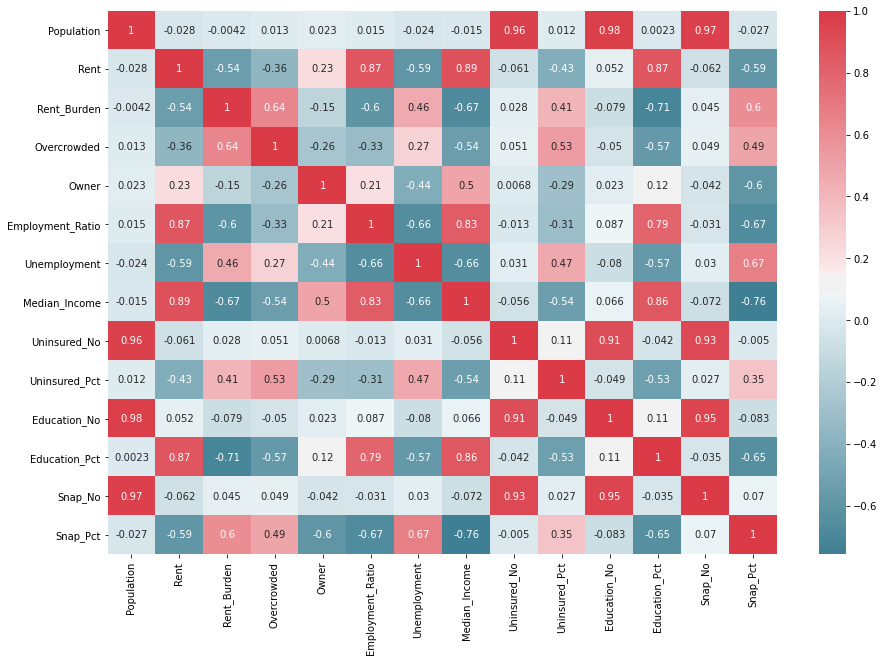

In [73]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
corrMatrix = df[df.columns[2:]].corr()
plt.figure(figsize=(15,10))
colormap=sn.diverging_palette(220,10,as_cmap=True)
sn.heatmap(corrMatrix, annot=True, cmap=colormap)
plt.show()

In [44]:
corrMatrix['Rent'].sort_values(ascending=False)

Rent                1.000000
Median_Income       0.890560
Education_Pct       0.867693
Employment_Ratio    0.867606
Owner               0.226082
Education_No        0.051541
Population         -0.027743
Uninsured_No       -0.060854
Snap_No            -0.062212
Overcrowded        -0.360327
Uninsured_Pct      -0.430552
Rent_Burden        -0.543363
Snap_Pct           -0.590771
Unemployment       -0.592704
Name: Rent, dtype: float64

In [ ]:
"""
for col in corrMatrix.columns:
    print(f'{col}:')
    print(corrMatrix[col].sort_values(ascending=False))
    print('\n')
"""

In [ ]:
"""
median_incomes - 2005-2018
monthly_rent - 2009-2018
arrests - 2000-2019
child_population_by_race_ethnicity - 2005-2018
median_monthly_rent - 2005-2018
home_ownership - 2005-2018
total_population - 2005-2018
child_population - 2005-2018
uninsured - 2008-2018
public_assistance_by_program_type - 2005-2017
unemployment_rate_ - 2005-2018
severe_rent_burden - 2005- 2018
educational_attainment - 2006-2018
overcrowded_rental_housing - 2005-2018
snap_(food_stamps) - 2001-2019
household_income - 2005-2018
public_assistance - 2005-2017
employment_population_ratio - 2005-2018
total_population_by_race_ethnicity - 2009-2018
"""

In [ ]:
#df.to_csv('../data.csv')

In [25]:
df.columns[3:]

Index(['Population', 'Rent', 'Rent_Burden', 'Overcrowded', 'Owner',
       'Employment_Ratio', 'Unemployment', 'Median_Income', 'Uninsured_No',
       'Uninsured_Pct', 'Education_Level', 'Education_No', 'Education_Pct',
       'Snap_No', 'Snap_Pct'],
      dtype='object')

In [48]:
d = df[['TimeFrame','Fips','Rent','Median_Income','Population','Rent_Burden','Employment_Ratio']].drop_duplicates().dropna()
d.Population = d.Population.round(2)

In [49]:
d.shape

(907, 7)

In [50]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 907 entries, 0 to 909
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TimeFrame         907 non-null    int64  
 1   Fips              907 non-null    int64  
 2   Rent              907 non-null    float64
 3   Median_Income     907 non-null    float64
 4   Population        907 non-null    float64
 5   Rent_Burden       907 non-null    float64
 6   Employment_Ratio  907 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 56.7 KB


In [52]:
for col in d.columns:
    print(col)
    print(d[col].value_counts())

TimeFrame
2018    65
2017    65
2016    65
2015    65
2014    65
2013    65
2012    65
2011    65
2010    65
2009    65
2008    65
2007    65
2006    65
2005    62
Name: TimeFrame, dtype: int64
Fips
503    14
205    14
304    14
303    14
302    14
       ..
318    14
401    14
110    13
210    13
109    13
Name: Fips, Length: 65, dtype: int64
Rent
2123.45679    6
2159.41606    5
1300.60030    3
1234.61524    3
688.62536     2
             ..
1271.90886    1
1319.51839    1
1298.75825    1
1201.71014    1
1440.00000    1
Name: Rent, Length: 801, dtype: int64
Median_Income
27899.35484     2
23439.43239     2
25729.00000     2
148152.00000    2
126355.68311    2
               ..
51284.00000     1
45535.94710     1
46430.18249     1
25535.92872     1
50048.00000     1
Name: Median_Income, Length: 851, dtype: int64
Population
139263.00    1
214163.00    1
111063.00    1
60752.61     1
155315.00    1
            ..
131923.00    1
107945.00    1
136017.00    1
107944.00    1
227328.00    1


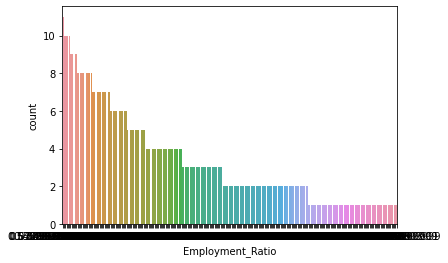

In [59]:
col = 'Employment_Ratio'
sn.countplot(d[col], order=d[col].value_counts().index)

No handles with labels found to put in legend.


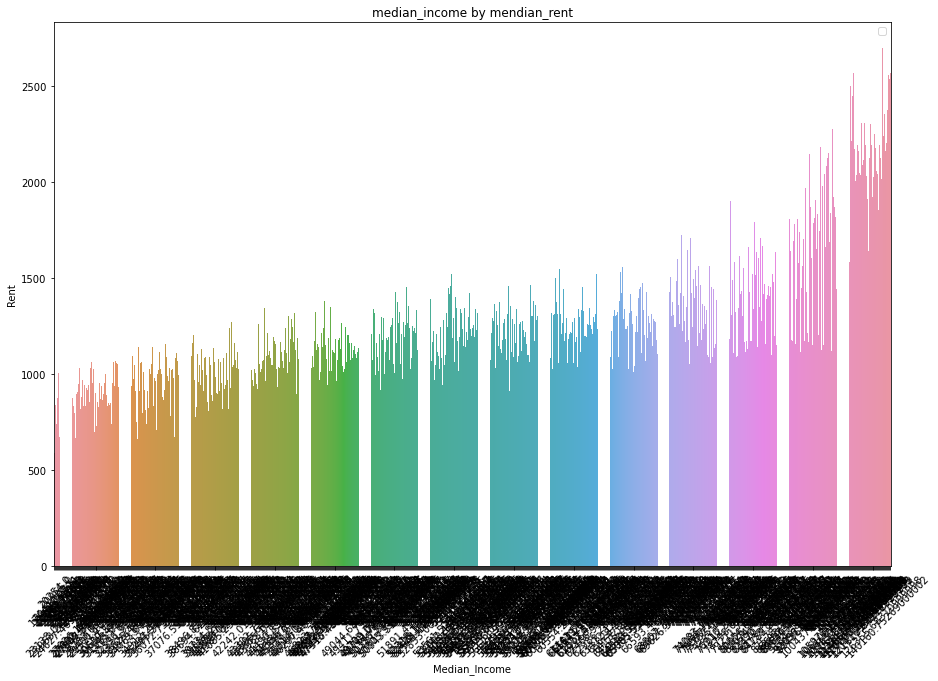

In [74]:
fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(15,10))
plt.title('median_income by mendian_rent')
plt.xlabel('Median Income')
plt.ylabel('Median Rent')
plt.xticks(rotation=45)
plt.legend()
sn.barplot(x='Median_Income', y='Rent', data=d)

In [63]:
d.describe()

,TimeFrame,Fips,Rent,Median_Income,Population,Rent_Burden,Employment_Ratio
count,907.000000,9.070000e+02,907.000000,907.000000,9.070000e+02,907.000000,907.000000
mean,2011.521499,5.939251e+04,1261.187887,59479.237771,3.865385e+05,0.276865,0.574221
std,4.022609,4.500538e+05,374.413286,25584.873041,1.098516e+06,0.059070,0.070849
min,2005.000000,1.010000e+02,590.339490,17446.707260,4.384156e+04,0.151750,0.375000
25%,2008.000000,2.050000e+02,1032.554035,41963.778905,1.203480e+05,0.232350,0.535000
50%,2012.000000,3.090000e+02,1176.111740,54378.965550,1.411900e+05,0.278310,0.571000
75%,2015.000000,4.070000e+02,1364.500000,71788.084630,1.794610e+05,0.319520,0.609000
max,2018.000000,3.651000e+06,2695.332190,148152.000000,8.622698e+06,0.464850,0.751000


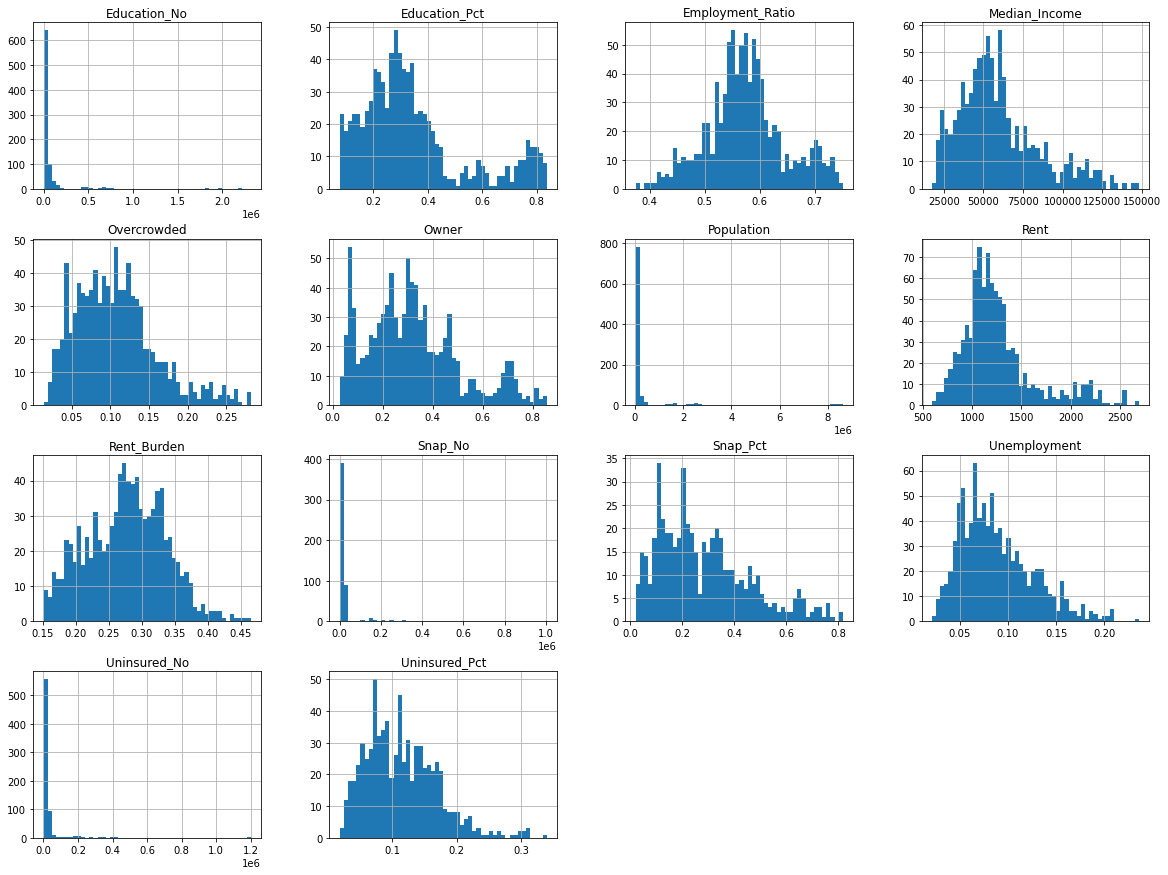

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt
df[df.columns[3:]].hist(bins=50, figsize=(20,15))
plt.show()

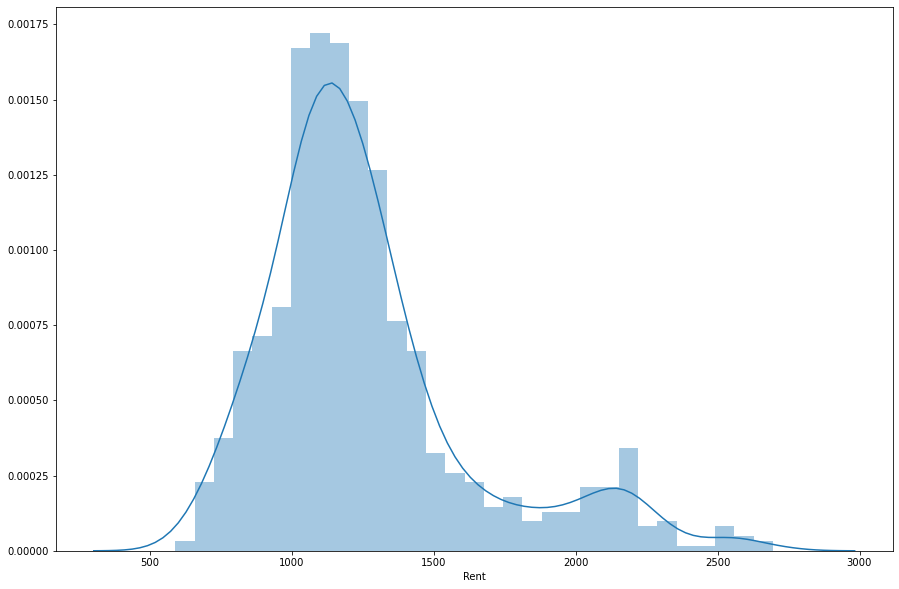

In [71]:
col = 'Rent'
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10))
sn.distplot(d[col],hist=True,kde=True,rug=False,label=col,norm_hist=True)

In [ ]:
list(set(df.Income_Level))

In [57]:
bins=[0.,14999.0,24999.0,34999.0,49999.0,74999.0,99999.0,199999.0,np.inf]
print(bins)

[0.0, 14999.0, 24999.0, 34999.0, 49999.0, 74999.0, 99999.0, 199999.0, inf]


In [58]:
labels=[
    'Under $15,000',
    '$15,000 to $24,999',
    '$25,000 to $34,999',
    '$35,000 to $49,999',
    '$50,000 to $74,999',
    '$75,000 to $99,999',
    '$100,000 to $199,999',
    '$200,000 or more'
    ]
print(labels)

['Under $15,000', '$15,000 to $24,999', '$25,000 to $34,999', '$35,000 to $49,999', '$50,000 to $74,999', '$75,000 to $99,999', '$100,000 to $199,999', '$200,000 or more']


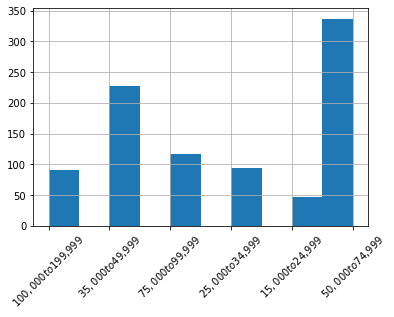

In [60]:
levels = pd.cut(df['Median_Income'],bins=bins,labels=labels)

levels.hist()
plt.xticks(rotation=45)
plt.show()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df['Income_Level']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

strat_test_set['Income_Level'].value_counts() / len(strat_test_set)


In [ ]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('Income_Level', axis=1, inplace=True)
strat_train_set

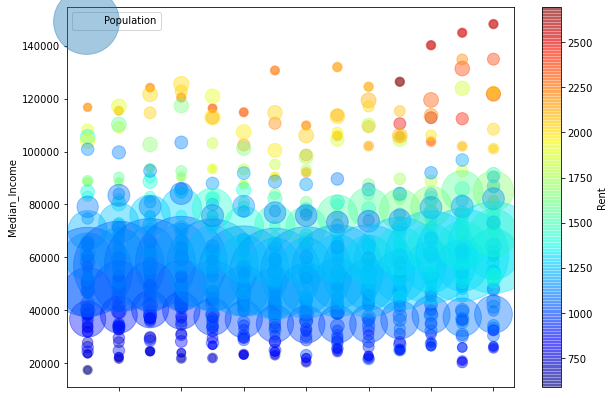

In [61]:
#df2 = strat_train_set.copy()
df.plot(kind='scatter', x='TimeFrame', y='Median_Income', alpha=0.4,
             s=df['Population']/1000, label='Population', figsize=(10,7),
             c='Rent', cmap=plt.get_cmap('jet'), colorbar=True)

plt.legend()

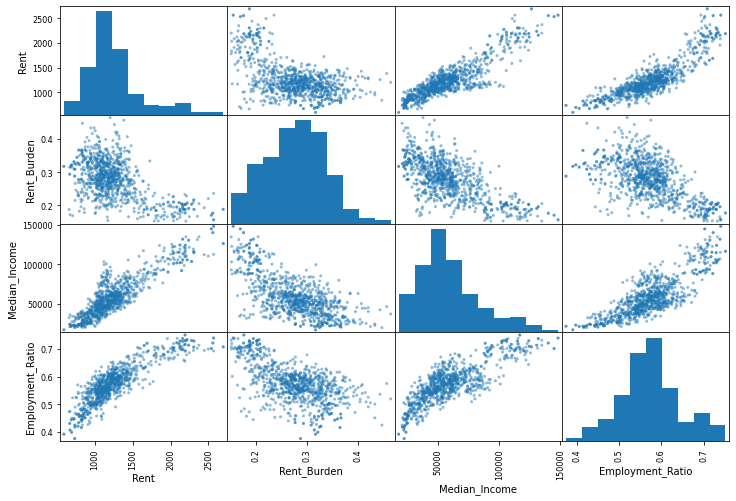

In [30]:
from pandas.plotting import scatter_matrix

attributes = ['Rent', 'Rent_Burden', 'Median_Income', 'Employment_Ratio']

scatter_matrix(df[attributes], figsize=(12,8))

plt.show()

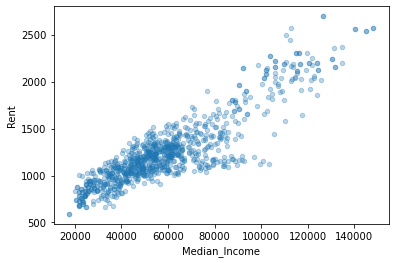

In [34]:
df.plot(kind='scatter', 
              x='Median_Income', 
              y='Rent', 
              alpha=0.3)

plt.show()

In [ ]:
df2 = strat_train_set[['TimeFrame',
           'Fips',
           'Population',
           'Rent_Burden',
           'Median_Income',
           'Employment_Ratio',
           'Unemployment']]
df2_labels = strat_train_set['Rent'].copy()

In [ ]:
print(df2.shape)
df2.head(2)

## Data Cleaning

In [41]:
# Replacing missing values with the median
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
df2 = df[['Rent','Population',
           'Rent_Burden',
           'Median_Income',
           'Employment_Ratio',
           'Unemployment']]
imputer.fit(df2)
print(imputer.statistics_)
X = imputer.transform(df2)
df_tr = pd.DataFrame(X, columns=df2.columns, index=df2.index)
df_tr.head()

[1.17465836e+03 1.41176000e+05 2.78285000e-01 5.43633686e+04
 5.71000000e-01 8.16200000e-02]


,Rent,Population,Rent_Burden,Median_Income,Employment_Ratio,Unemployment
0,2191.21645,51150.45963,0.17644,116703.49427,0.751,0.033
1,2191.21645,75508.54037,0.17644,116703.49427,0.751,0.033
2,817.19484,145556.00000,0.23809,40241.54525,0.564,0.088
3,1781.33008,88754.39184,0.19318,88613.25358,0.677,0.066
4,1781.33008,44420.60816,0.19318,88613.25358,0.677,0.066


### Machine Learning Algorithm

### Simple Linear Regression 1

In [89]:
# Assign the data to X and y
col = 'Median_Income'
columns = ['Rent',col]
#columns = ['Rent','Population','Rent_Burden','Median_Income','Employment_Ratio', 'Unemployment']
d = df[columns].dropna()
X = d[columns[1:]]
y = d['Rent'].values.reshape(-1, 1)
print(X.shape, y.shape)

(910, 1) (910, 1)


In [90]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)

(637, 1)
(273, 1)


In [91]:
# Create a simple 1 variable model using LinearRegression

from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [92]:
# Fit the model to the training data and calculate the scores for the training and testing data

model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.7612734370015319
Testing Score: 0.8516461779558584


Text(0.5, 1.0, 'Residual Plot')

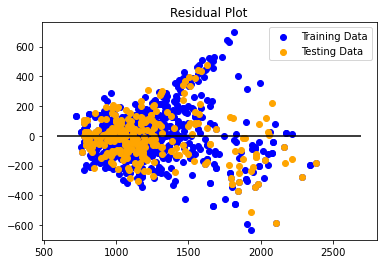

In [93]:
# Plot the Residuals for the Training and Testing data
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")


### StandardScaler

In [94]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [95]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

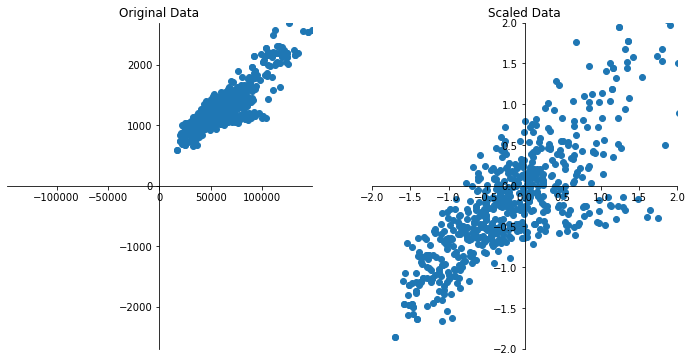

In [96]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train[col].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train[col], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

plt.show()

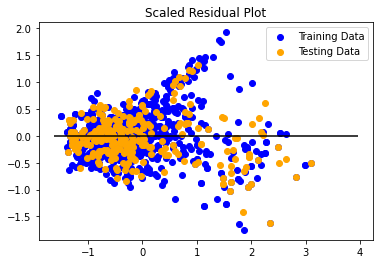

In [97]:
# Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Scaled Residual Plot")
plt.show()

In [98]:
# Quantify the model using the scaled data
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.18266003437423514, R2: 0.8516461779558584


### Simple Linear Regression 2

In [100]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [102]:
col = 'Median_Income'
train_data,test_data=train_test_split(d,train_size=0.8,random_state=3)
reg=linear_model.LinearRegression()
x_train=np.array(train_data[col]).reshape(-1,1)
y_train=np.array(train_data['Rent']).reshape(-1,1)
reg.fit(x_train,y_train)

x_test=np.array(test_data[col]).reshape(-1,1)
y_test=np.array(test_data['Rent']).reshape(-1,1)
pred=reg.predict(x_test)
print('linear model')
mean_squared_error=metrics.mean_squared_error(y_test,pred)
print('Sqaured mean error', round(np.sqrt(mean_squared_error),2))
print('R squared training',round(reg.score(x_train,y_train),3))
print('R sqaured testing',round(reg.score(x_test,y_test),3) )
print('intercept',reg.intercept_)
print('coefficient',reg.coef_)

linear model
Sqaured mean error 165.17
R squared training 0.788
R sqaured testing 0.813
intercept [487.77155083]
coefficient [[0.01299704]]


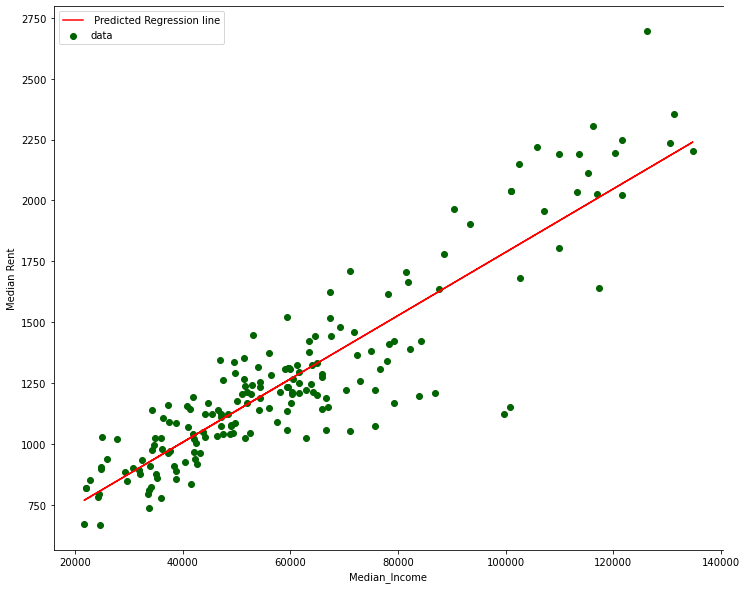

In [103]:
_, ax = plt.subplots(figsize= (12, 10))
plt.scatter(x_test, y_test, color= 'darkgreen', label = 'data')
plt.plot(x_test, reg.predict(x_test), color='red', label= ' Predicted Regression line')
plt.xlabel(col)
plt.ylabel('Median Rent')
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

### Multiple Line Regression

In [123]:
columns = ['Rent','Median_Income','Population','Rent_Burden','Employment_Ratio']
d = df[columns].dropna().fillna(0)
X = d[columns[1:]]
y = d['Rent'].values.reshape(-1, 1)
print(X.shape, y.shape)

(907, 4) (907, 1)


In [138]:
X_train, X_test = train_test_split(d, train_size=0.8, random_state=3)

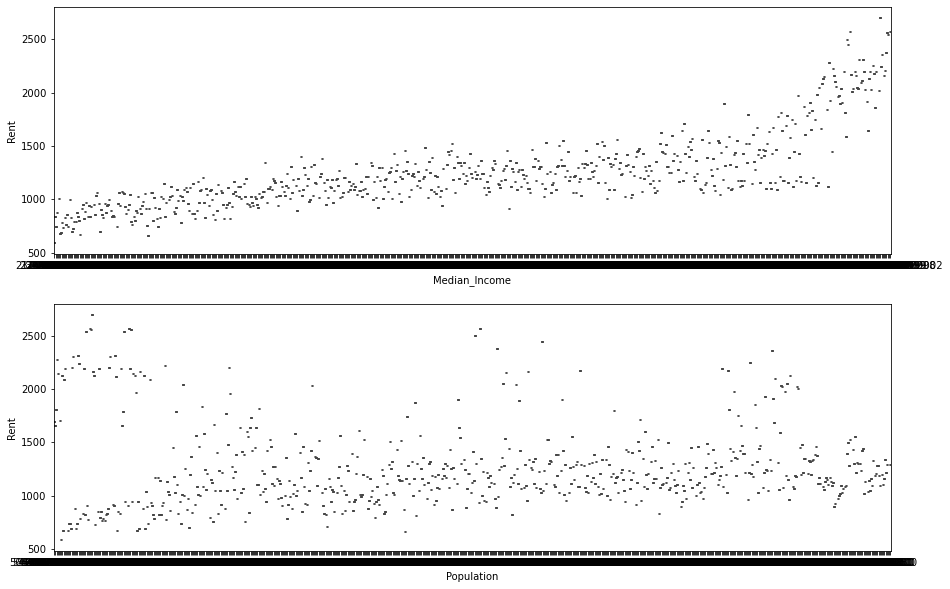

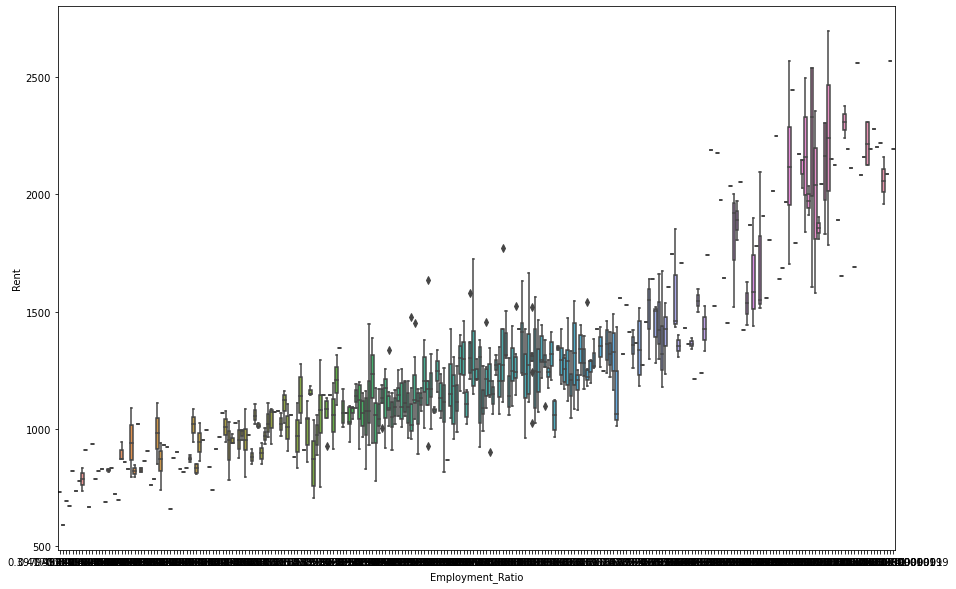

In [139]:
fig,ax=plt.subplots(2,1,figsize=(15,10))
sn.boxplot(x=X_train['Median_Income'],y=X_train['Rent'],ax=ax[0])
sn.boxplot(x=X_train['Population'],y=X_train['Rent'],ax=ax[1])
_ , axes = plt.subplots(1, 1, figsize=(15,10))
sn.boxplot(x=X_train['Employment_Ratio'],y=X_train['Rent'])

In [124]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=3)

In [125]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(x_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(x_train)
X_test_scaled = X_scaler.transform(x_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [143]:
features=columns[1:]
print('features: ', features)
print()
reg=linear_model.LinearRegression()
reg.fit(X_train_scaled,y_train_scaled)
pred=reg.predict(X_test_scaled)
print('complex_model 1')
mean_squared_error=metrics.mean_squared_error(y_test_scaled,pred)
print('mean squared error(MSE)', round(np.sqrt(mean_squared_error),2))
print('R squared training',round(reg.score(X_train_scaled,y_train_scaled),3))
print('R squared testing', round(reg.score(X_test_scaled,y_test_scaled),3))
print('Intercept: ', reg.intercept_)
print('Coefficient:', reg.coef_)

features:  ['Median_Income', 'Population', 'Rent_Burden', 'Employment_Ratio']

complex_model 1
mean squared error(MSE) 0.36
R squared training 0.857
R squared testing 0.859
Intercept:  [4.75292703e-16]
Coefficient: [[ 0.60617933 -0.024087    0.13839477  0.45126174]]


In [146]:
from sklearn import linear_model
import statsmodels.api as sm

In [150]:
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X_train_scaled, y_train_scaled)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y_train_scaled, X_train_scaled).fit()
predictions = model.predict(X_train_scaled) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 [4.75292703e-16]
Coefficients: 
 [[ 0.60617933 -0.024087    0.13839477  0.45126174]]
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.857
Model:                            OLS   Adj. R-squared (uncentered):              0.856
Method:                 Least Squares   F-statistic:                              1079.
Date:                Sat, 18 Jul 2020   Prob (F-statistic):                   1.25e-302
Time:                        12:40:24   Log-Likelihood:                         -323.95
No. Observations:                 725   AIC:                                      655.9
Df Residuals:                     721   BIC:                                      674.2
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef 

## Categorical Attributes

In [ ]:
income_cat = df[['Income_Level']]
income_cat.head(10)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
income_cat_encoded = ordinal_encoder.fit_transform(income_cat)
income_cat_encoded[:10]

In [ ]:
ordinal_encoder.categories_

### One-Hot Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
income_cat_1hot = cat_encoder.fit_transform(income_cat)
income_cat_1hot
print(cat_encoder.categories_)
income_cat_1hot.toarray()

In [ ]:
corr_matrix = df2.corr()

In [ ]:
corr_matrix


In [ ]:
corr_matrix['Rent'].sort_values(ascending=False)

In [1]:
from sklearn.datasets import fetch_newyork_housing

ImportError: cannot import name 'fetch_newyork_housing'